In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle  # pip install pywaffle

%matplotlib inline

In [2]:
installs = pd.read_csv('data/installs.csv.gzip', compression = 'gzip')

## **Analisis inicial**

In [4]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [5]:
len(installs)

3412

In [6]:
installs.isnull().sum()
# click_hash, device_brand, user_agent (1/2 nulls), event_uuid, kind, wifi (1/2 nulls), trans_id son casi todos Null #

created                  0
application_id           0
ref_type                 0
ref_hash                 0
click_hash            3412
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

In [7]:
installs['attributed'].value_counts()
# Todos los valores son False, no aporta informacion relevante #

False    3412
Name: attributed, dtype: int64

In [3]:
installs['created'] = pd.to_datetime(installs['created'])

In [4]:
installs['hour'] = installs['created'].dt.hour

In [10]:
installs['day'] = installs['created'].dt.day

## 1 - Cantitad de installs por tipo

In [11]:
installs.kind.unique()

array([nan, 'Open', 'open', 'registration', 'app_open',
       'EVENT_LISTINGVIEW_FLIGHT', 'EVENT_Homepage', 'EVENT_OPEN_APP',
       'af_app_opened', 'deeplink', 'EVENT_PROMO', 'EVENT_HOMEPAGE',
       'af_list_view', 'install', 'journey first drop off',
       'reattribution', 'journey reserved', 'journey drop off',
       'account_summary_first_step', 'login_success',
       'payment method add'], dtype=object)

In [12]:
kinds = installs.groupby('kind').agg({'kind':'count'})

In [13]:
kinds = kinds.rename(index=str, columns={"kind":"kind_count","index":"kind"})
kinds = kinds.sort_values('kind_count', ascending=False)

Me quedo unicamente con los tipos de instalacion que sucedieron mas de 10 veces

In [14]:
kinds = kinds.loc[(kinds['kind_count'] > 10), ['kind_count']]

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


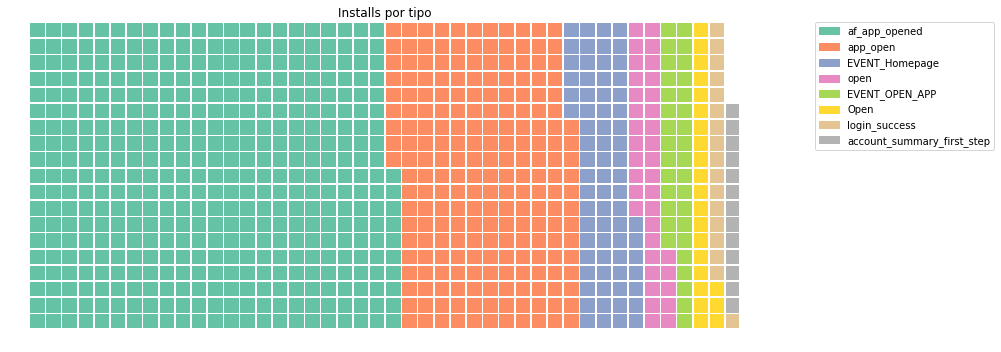

In [15]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=19,
    figsize=(14, 8),
    values=kinds.kind_count,
    labels=list(kinds.index),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1.02)},
    title={'label': 'Installs por tipo', 'loc': 'center'},
)

## 2 - Cantidad de installs por device brand

In [16]:
installs_graficable = installs.groupby('device_brand').agg({'device_brand':'count'})
installs_graficable.columns= ['count_installs']

In [17]:
installs_graficable = installs_graficable.sort_values(by=['count_installs'],ascending=False)
installs_graficable = installs_graficable.head(10)
installs_graficable['Alias'] = ['A','C','E','X','D','B','F','I','G','J']
#installs_graficable = installs_graficable.sort_values('Alias')

### Los alias son los mismos que en events

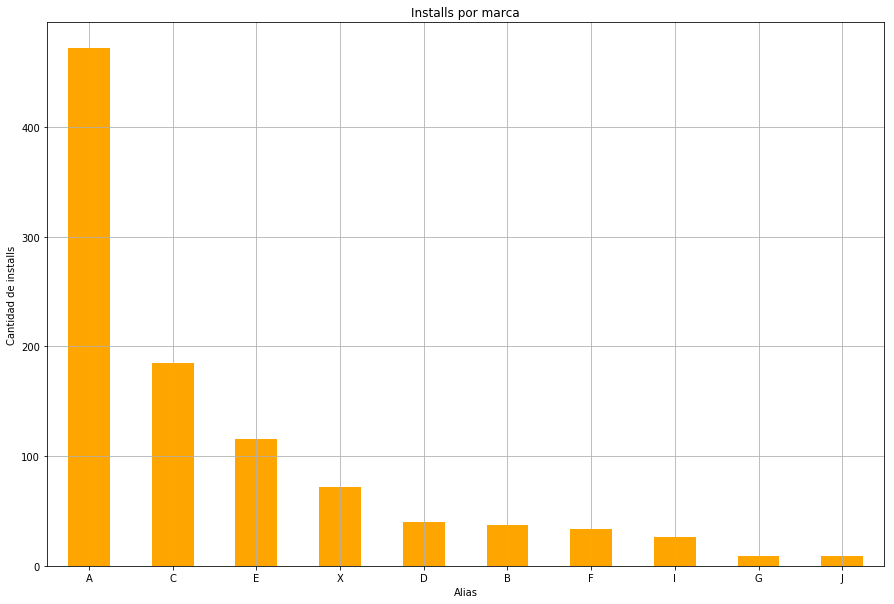

In [18]:
grph2 = installs_graficable.plot.bar(grid = True, x='Alias',figsize = (15,10), rot = 0, legend = False, title = 'Installs por marca', color = 'orange')
grph2.set_xlabel('Alias')
grph2.set_ylabel('Cantidad de installs');

3.083059e+17	A //
3.812621e+18	B //
2.208835e+18	C //
2.987569e+18	D //
2.523246e+18	E //
5.137992e+17	F //
3.228516e+18	G //
6.538562e+18	I //
1.083369e+18	J //
5.951325e+18	X //

## 3 - Comparacion de events e installs por device brand

In [19]:
events = pd.read_csv('data/events.csv.gzip', compression='gzip', low_memory = False)
events_graficable = events.groupby('device_brand').agg({'device_brand':'count'})
events_graficable.columns= ['cantidad_eventos']

In [20]:
events_graficable = events_graficable.sort_values(by=['cantidad_eventos'],ascending=False)
events_graficable = events_graficable.head(10)
events_graficable['Alias'] = ['A','B','C','D','E','F','G','H','I','J']

In [21]:
merged = events_graficable.merge(installs_graficable, on = 'device_brand', how = 'inner')

In [22]:
merged = merged[['cantidad_eventos','count_installs','Alias_x']]
merged.reset_index(inplace = True)

In [23]:
merged.columns = ['device_brand', 'Events', 'Installs', 'Alias']

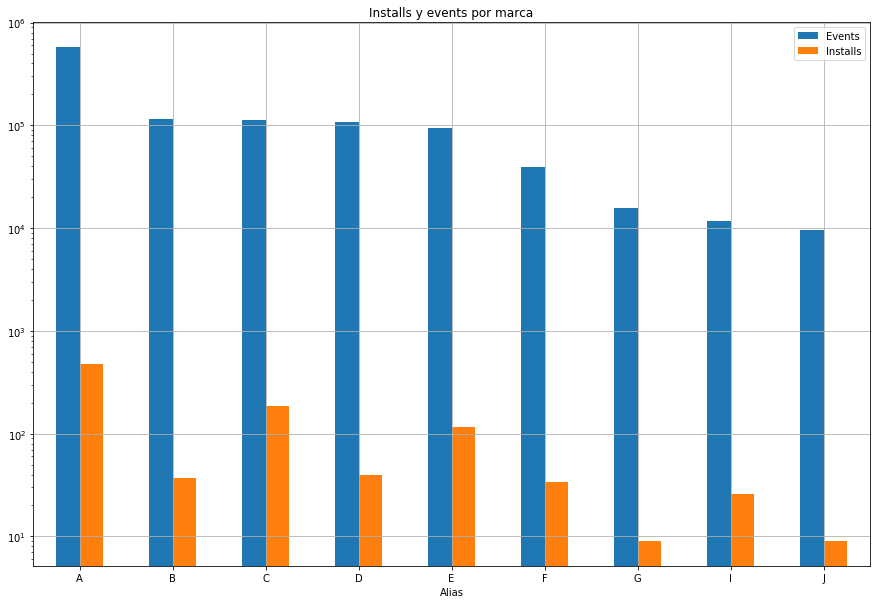

In [24]:
grph3 = merged.loc[:,['Events','Installs', 'Alias']].plot.bar(grid = True, x = 'Alias',figsize = (15,10), rot = 0, title = 'Installs y events por marca')
grph3.set_yscale('log')
grph3.set_xlabel('Alias');

Se puede ver que la marca A es la que mas interacciones totales tuvo. El resto de los installs son bastante parejos por lo que la informacion acerca de los events sigue siendo mas relevante para cada caso.

## 4 - Comparacion de instalaciones: hechas con o sin wifi

In [25]:
graph4 = installs.groupby('wifi').agg({'wifi':'count'})
graph4.columns = ['cantidad']
#graph4.reset_index(inplace = True)
graph4.loc[0,'Aux_index'] = 'Sin_wifi'
graph4.loc[1,'Aux_index'] ='Con_wifi'
graph4.set_index('Aux_index', drop =True, inplace =True)

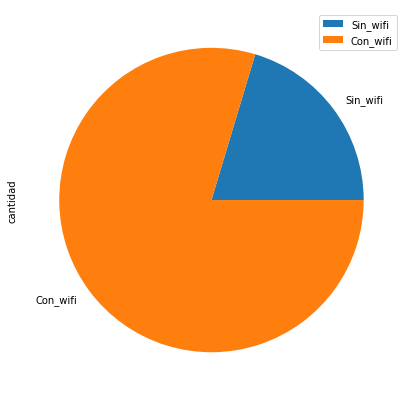

In [26]:
graph4 = graph4.plot.pie('cantidad', figsize = (7,7))

Se puede ver que la mayoría de las instalaciones fueron realizadas utilizando wifi.

## 5 - Idioma de los dispositivos

In [22]:
graph5 = installs.groupby('device_language').agg({'device_language':'count'})
graph5.columns = ['cantidad']
graph5 = graph5.sort_values(by = 'cantidad',ascending = False)
graph5 = graph5.head(10)
graph5['Alias'] = ['A','B','C','D','E','F','G','H','I','J']
graph5

,cantidad,Alias
device_language,,
3.301378e+18,1484,A
9.028383e+18,714,B
4.621024e+18,632,C
6.977049e+18,238,D
4.077062e+17,70,E
1.526421e+18,56,F
4.060930e+18,48,G
2.822843e+17,39,H
6.035180e+18,24,I


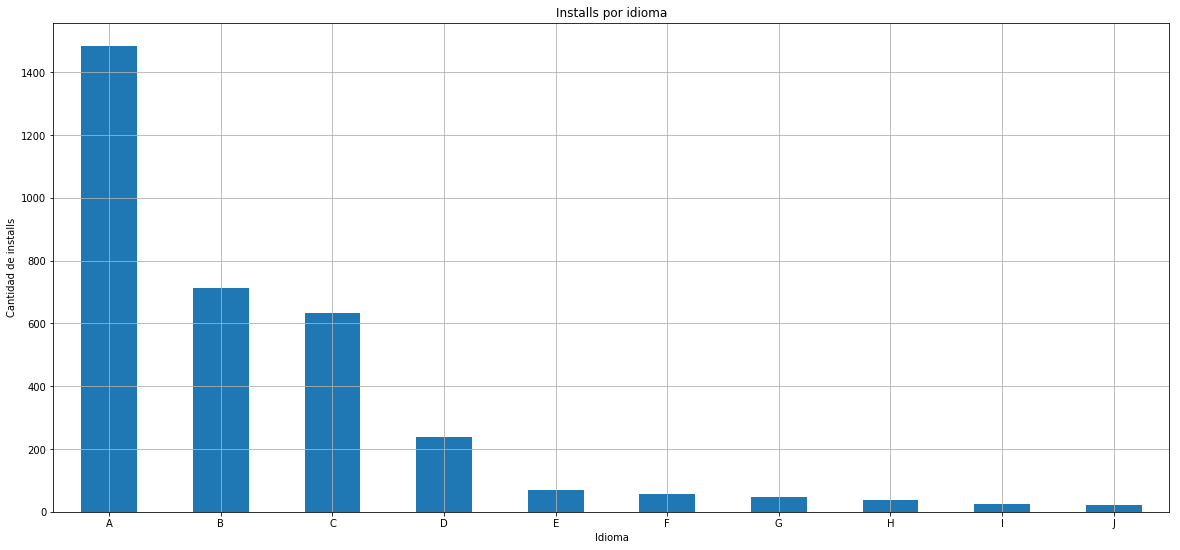

In [23]:
graph5 = graph5.plot.bar(grid = True, x = 'Alias',figsize = (20,9), title = 'Installs por idioma', legend = False, rot = 0)
graph5.set_xlabel('Idioma')
graph5.set_ylabel('Cantidad de installs');

Se puede ver que hay un idioma predominante.

## 6 - Cantidad de installs por hora

In [5]:
inst_hora = installs.groupby('hour').agg({'hour':'count'})

In [6]:
inst_hora.columns = ['count']

In [7]:
from math import pi

labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
angles = [i / float(24) * 2 * pi for i in range(24)]
angles += angles[:1]  #cerrar el círculo

Text(0.5, 1.08, 'Cantidad por hora')

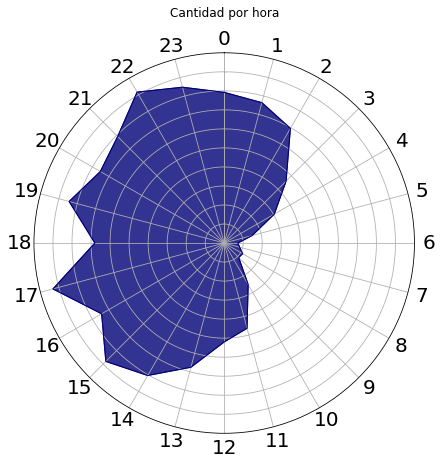

In [9]:
fig=plt.figure(figsize=(7,7))
series = plt.subplot(111, polar=True)
    
series.set_theta_offset(pi / 2)
series.set_theta_direction(-1)

plt.xticks(angles, labels, color='#000000', size=20)

plt.yticks([25, 50, 75, 100, 125, 150, 175, 200, 225], ['25', '50', '75', '100', '125', '150', '175', '200', '225'], color='#999999', size=2)
plt.ylim(0,250)

horas = inst_hora['count'].tolist()
horas += horas[:1]

series.set_rlabel_position(0)
series.plot(angles, horas, color='#000077', linestyle='solid', linewidth=1)
series.fill(angles, horas, color='#000077', alpha=0.8)
series.set_title('Cantidad por hora', y=1.08)

## 7 - Cantidad de installs por dia

In [32]:
inst_dia = installs.groupby('day').agg({'day':'count'})

In [33]:
inst_dia.columns = ['count']

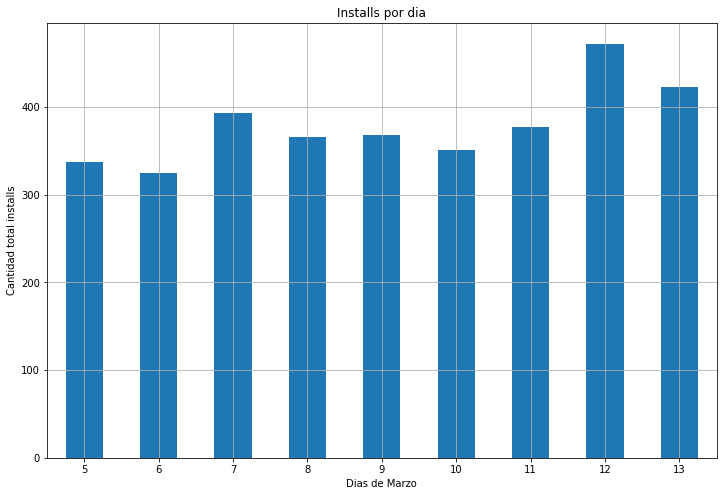

In [37]:
grph7 = inst_dia.plot.bar(figsize = (12,8), legend = False, rot = 0, title = 'Installs por dia', grid =True)
grph7.set_ylabel('Cantidad total installs')
grph7.set_xlabel('Dias de Marzo');

## 8 - Cantidad de installs por dia y hora

In [35]:
installs_day_hour = installs.groupby(['day','hour']).agg({'hour':'count'})
installs_day_hour = installs_day_hour.rename(columns={'hour':'count'})
installs_day_hour = installs_day_hour.reset_index()
installs_day_hour.head()

,day,hour,count
0,5,0,22
1,5,1,21
2,5,2,14
3,5,3,11
4,5,4,2


'Sharex = False' es porque no me mostraba el eje x (ni idea que onda) - Lucas

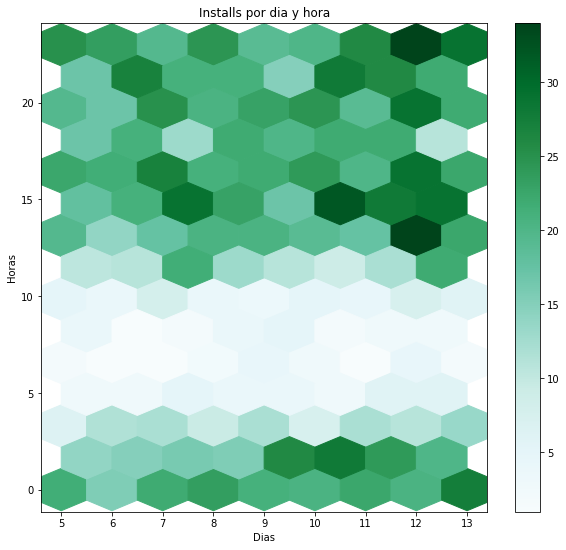

In [36]:
grph8 = installs_day_hour.plot.hexbin(x='day',y='hour', C= 'count', figsize = (10,9), gridsize = (8,7),sharex=False, title = 'Installs por dia y hora')
grph8.set_xlabel('Dias')
grph8.set_ylabel('Horas');